In [1]:
import numpy as np
from scipy.sparse import csr_array, kron, eye_array
from scipy.stats import norm
import scipy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from scipy import optimize

sns.color_palette('colorblind')
sns.set_theme('notebook', style='whitegrid')
plt.rcParams.update({'text.usetex': True})

In [2]:
start_color = (128/255, 128/255, 255/255)
end_color = (1,1,1)
cmap = LinearSegmentedColormap.from_list("custom_blue_white", [end_color, start_color])

FileNotFoundError: [Errno 2] No such file or directory: '/home/tj/school/MA453/Project/ltx/images/linepair.png'

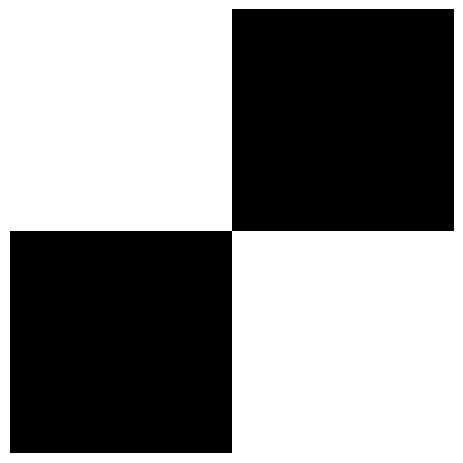

In [2]:
m = 80
linepair = np.zeros((m,m))
linepair[m//2:,m//2:] = 1.0
linepair[:m//2,:m//2] = 1.0
plt.imshow(linepair, cmap='gray')
plt.grid(False)
plt.axis(False)
plt.tight_layout()
plt.savefig("./ltx/images/linepair.png")

In [3]:
x = np.linspace(0,m,m)
psf = norm.pdf(x, loc=0, scale=4)
psf /= np.sum(psf) * 2
Ax = la.toeplitz(psf)
A = kron(Ax, Ax)

In [ ]:
import regularizers
psf = psf.reshape((-1,))
test = regularizers.square_toeplitz_with_fft(psf)
othertest = psf @ psf

plt.imshow(test)
plt.show()

plt.imshow(othertest)
plt.show()

ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 2 dimension(s) and the array at index 1 has 1 dimension(s)

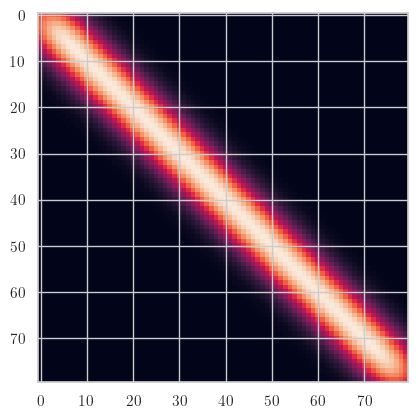

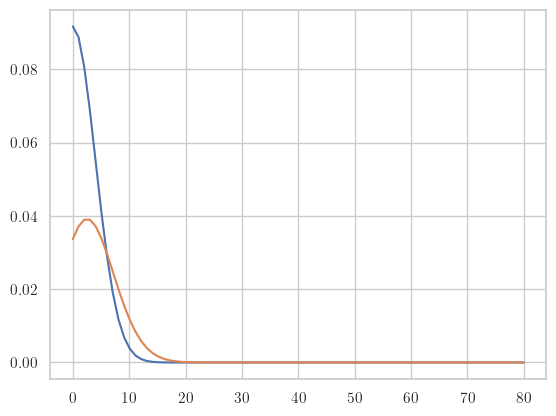

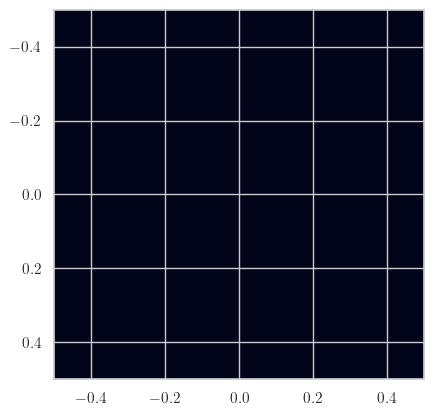

In [ ]:
test = Ax @ Ax
plt.imshow(test)
plt.show()

plt.plot(x, psf)
plt.plot(x, test[:,0])
plt.show()

plt.imshow(psf.reshape(-1,1) @ psf.reshape(1,-1))
plt.show()

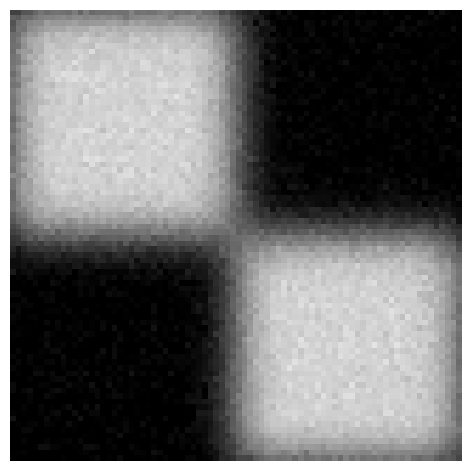

In [8]:
blurred = A @ linepair.reshape((-1,1))
blurred = blurred.reshape((m,m))
noise = np.random.normal(0,0.025,(m,m))
blurred_noise = blurred + noise
plt.imshow(blurred_noise, cmap='gray', vmin=0, vmax=1)
plt.grid(False)
plt.axis(False)
plt.tight_layout()
#plt.savefig("./ltx/images/blurrednoise.png")

['2_25', '1_25', '5_5', '1_0', '1_100', '2_0', '1_5', '2_100', '5_25', '5_100', '5_0', '2_5', 'base']


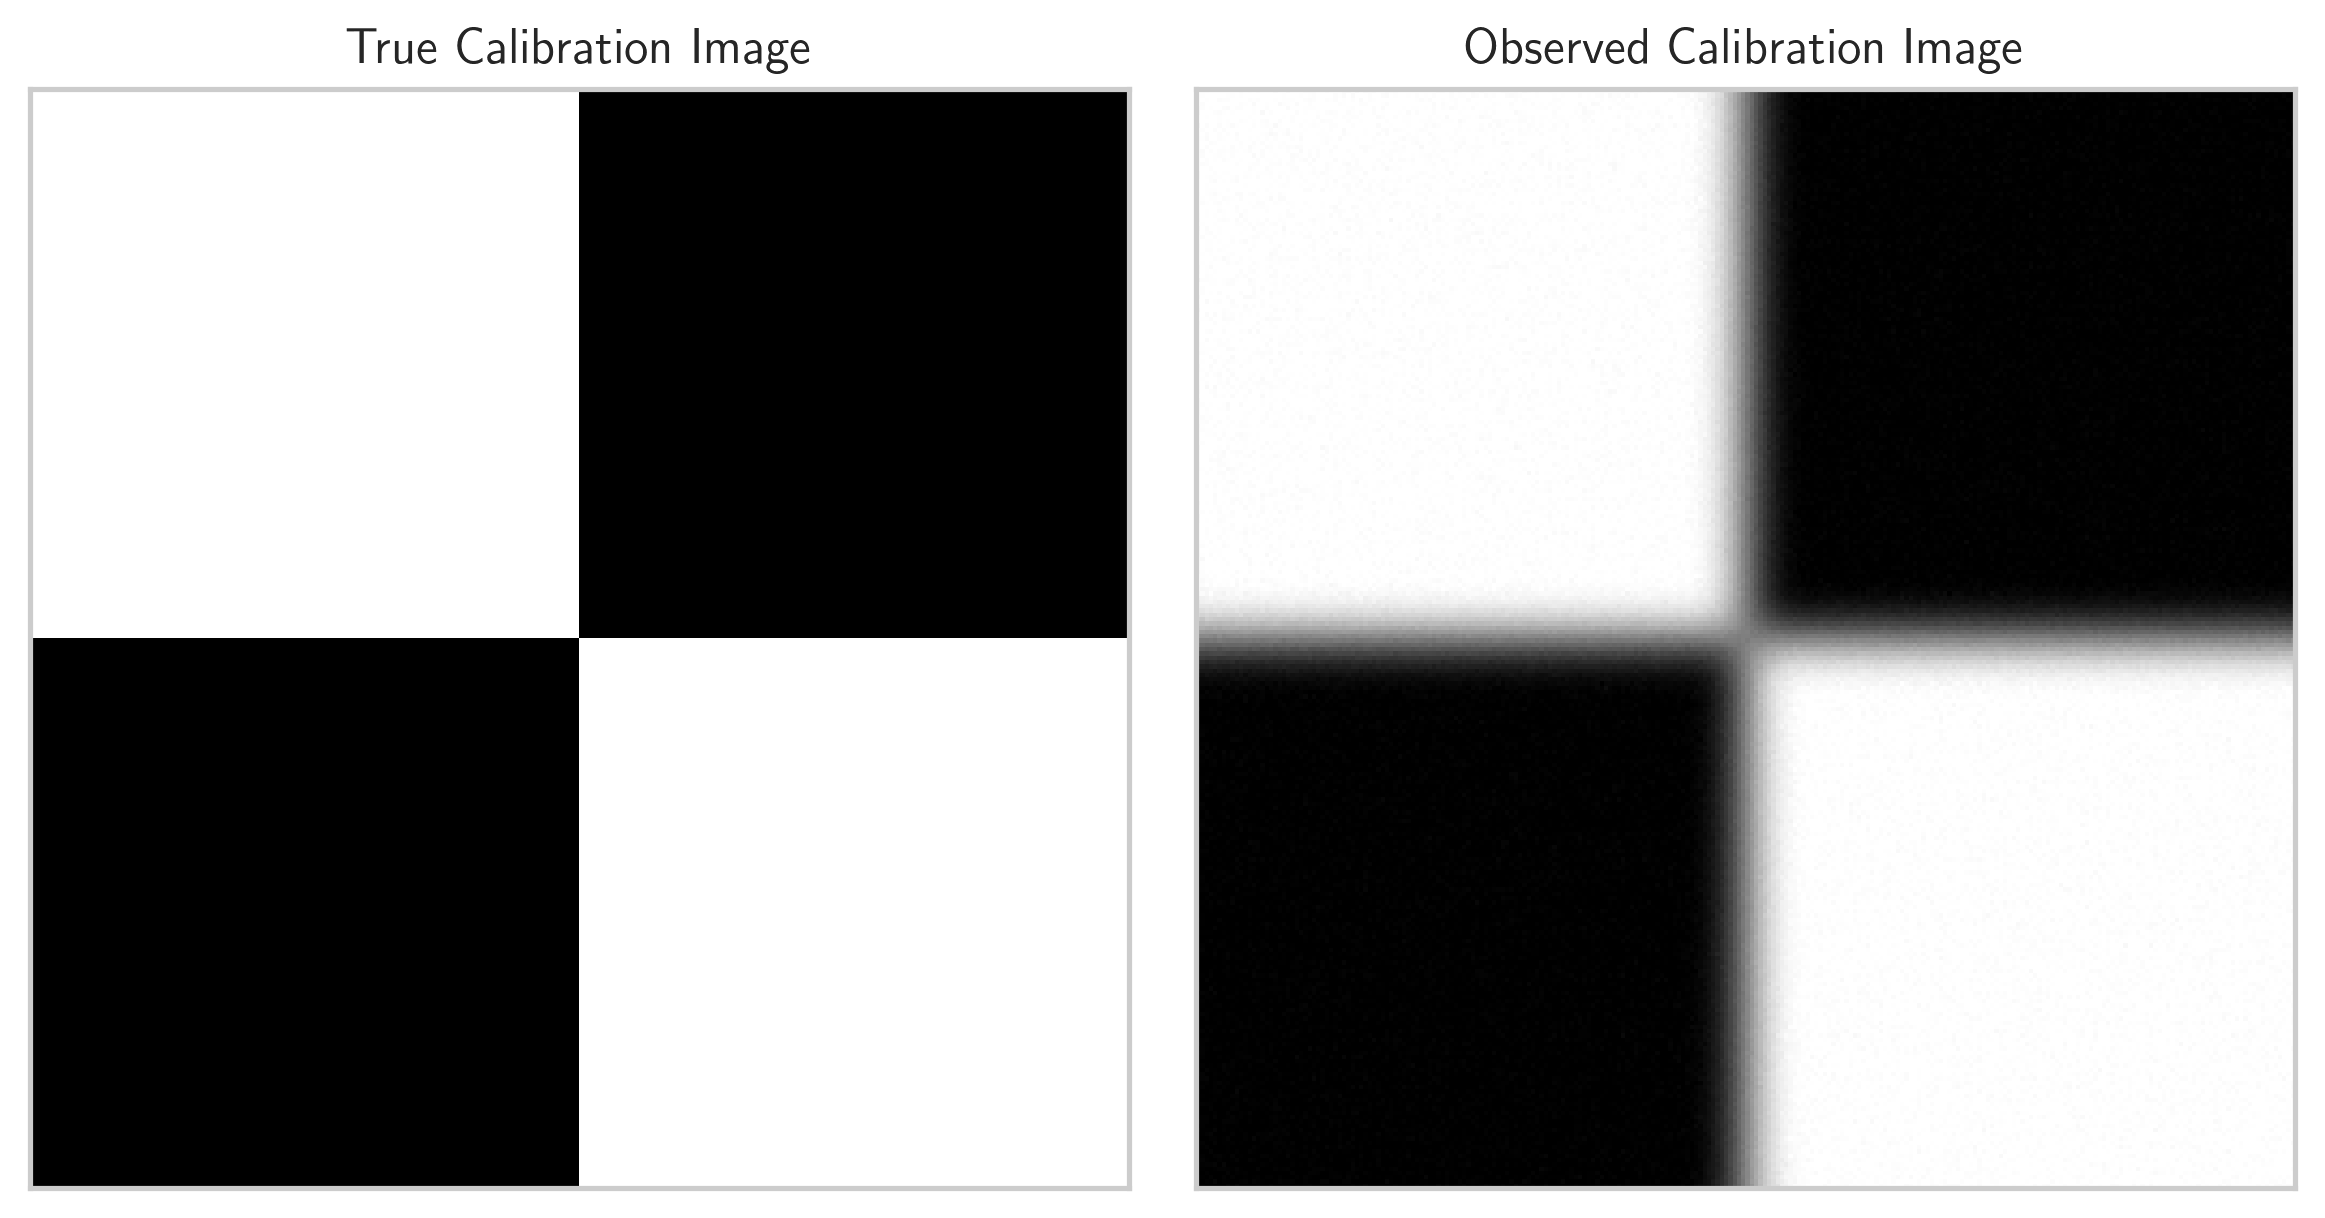

In [8]:
image = np.load("server_prep/calib_images.npz")
print(image.files)
fig, ax = plt.subplots(1,2)
ax[0].imshow(image['base'], cmap='gray')
ax[0].set_title("True Calibration Image")
ax[1].imshow(image['5_5'], cmap='gray')
ax[1].set_title("Observed Calibration Image")

for a in ax:
    a.grid(False)
    a.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
    for spine in a.spines.values():
        spine.set_visible(True)

fig.tight_layout()
fig.set_dpi(300)
fig.set_size_inches(8,5)
plt.show()
#plt.savefig("./ltx/images/imgcompare.png")

  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 0.9063374126476598
        x: [ 3.053e-01  9.997e-01]
      nit: 5
      jac: [ 2.238e-01 -1.474e+01]
 hess_inv: [[ 4.215e-03 -1.932e-03]
            [-1.932e-03  1.078e-03]]
     nfev: 206
     njev: 67


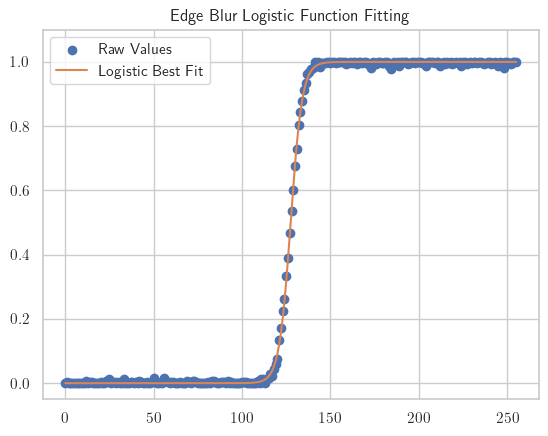

In [14]:
blurred_noise = image['5_5']/255
m=256
lineout = blurred_noise[m-m//4,:]
def log_match(login):
    k = login[0]
    height = login[1]
    x = np.linspace(0,m,m)
    y = height/(1+np.exp(-k*(x-m//2)))
    diff = np.sum(np.abs(lineout-y))
    return diff

def log_eq(login):
    k = login[0]
    height = login[1]
    x = np.linspace(0,m,m)
    y = height/(1+np.exp(-k*(x-m//2)))
    return y

best_k = optimize.minimize(log_match, [0.5, 0.8])
print(best_k)
log_curve = log_eq(best_k.x)
plt.scatter(range(m),lineout)
plt.plot(range(m), log_curve, color="C1")
plt.title("Edge Blur Logistic Function Fitting")
plt.legend(["Raw Values", "Logistic Best Fit"])
plt.ylim(-0.05,1.1)
plt.show()
#plt.savefig("./ltx/images/edgefit.png")

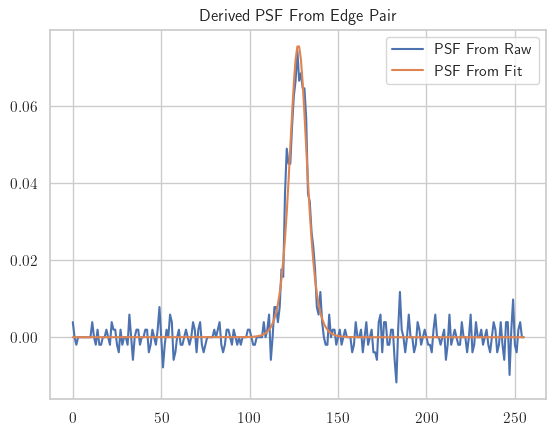

In [16]:
psf = np.gradient(log_curve)
noisy_psf = np.gradient(lineout)
plt.plot(noisy_psf)
plt.plot(psf)
plt.title("Derived PSF From Edge Pair")
plt.legend(["PSF From Raw", "PSF From Fit"])
plt.show()

#plt.savefig("./ltx/images/derivedpsf.png")

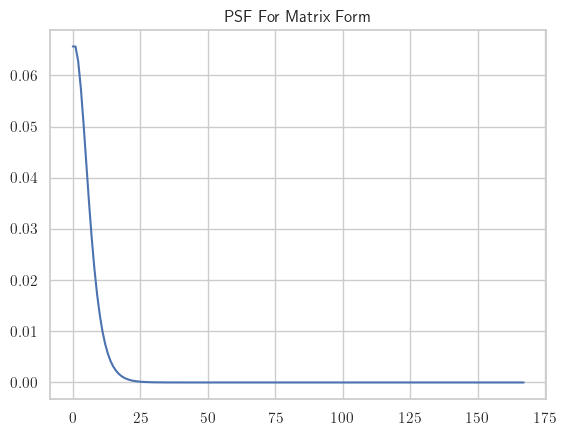

In [19]:
padded_psf = psf[127:].reshape(-1,1)
pad = np.zeros((39,1))
padded_psf = np.concatenate((padded_psf, pad))
padded_psf /= np.sum(padded_psf) * 2
plt.plot(padded_psf)
plt.title("PSF For Matrix Form")
plt.show()
#plt.savefig("./ltx/images/matrixpsf.png")

In [12]:
## Image creation
n = 6
img = np.random.normal(127,63, (n,n)).astype(np.uint8)
flat_img = img.reshape((-1, 1))

In [13]:
## Kernel Creation
x = np.linspace(0,n,n)
y = norm.pdf(x, loc=0, scale=1)
y /= np.sum(y)
y = y.astype(np.float32)

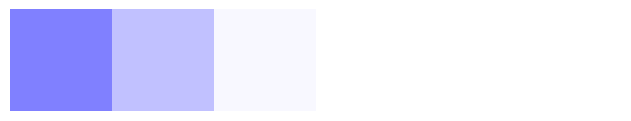

In [14]:
plt.imshow(y.reshape((1,n)), cmap=cmap)
plt.axis(False)
plt.tight_layout()
plt.show()

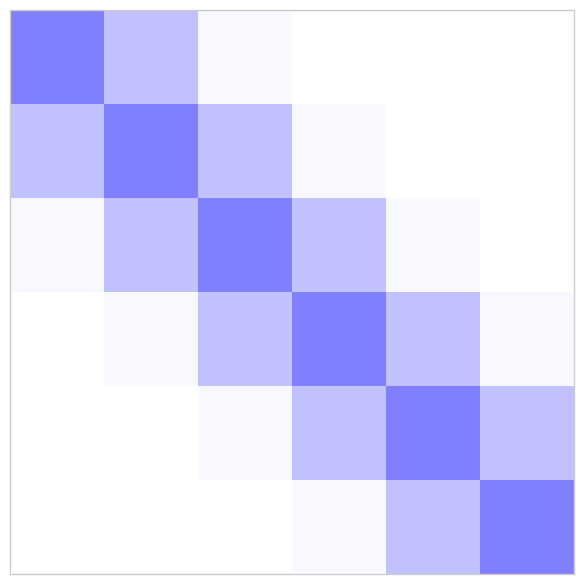

In [15]:
Ax = la.toeplitz(y)
fig, ax = plt.subplots(1)
ax.imshow(Ax, cmap=cmap)
#ax.axis(False)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
for spine in ax.spines.values():  # Keep the border
        spine.set_visible(True)
ax.grid(False)
fig.tight_layout()
fig.set_size_inches(6,6)
#fig.savefig("./ltx/images/toeplitz.png")
#fig.show()

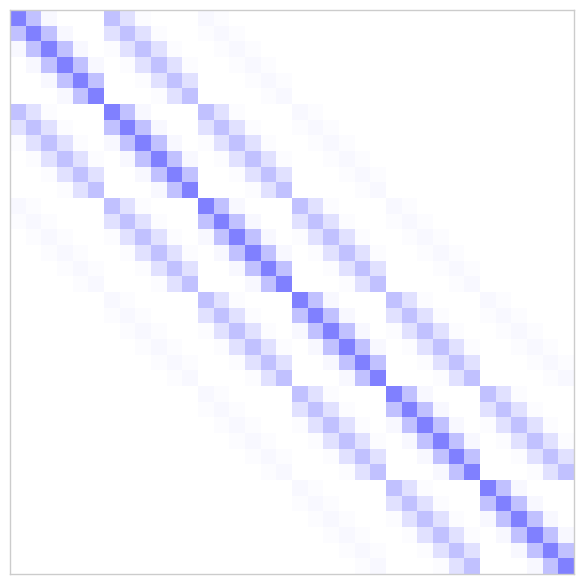

In [16]:
test = la.kron(Ax, Ax)
fig, ax = plt.subplots(1)
ax.imshow(test, cmap=cmap)
ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)
for spine in ax.spines.values():  # Keep the border
        spine.set_visible(True)
ax.grid(False)
fig.tight_layout()
fig.set_size_inches(6,6)
#fig.savefig("./ltx/images/kron.png")
plt.show()

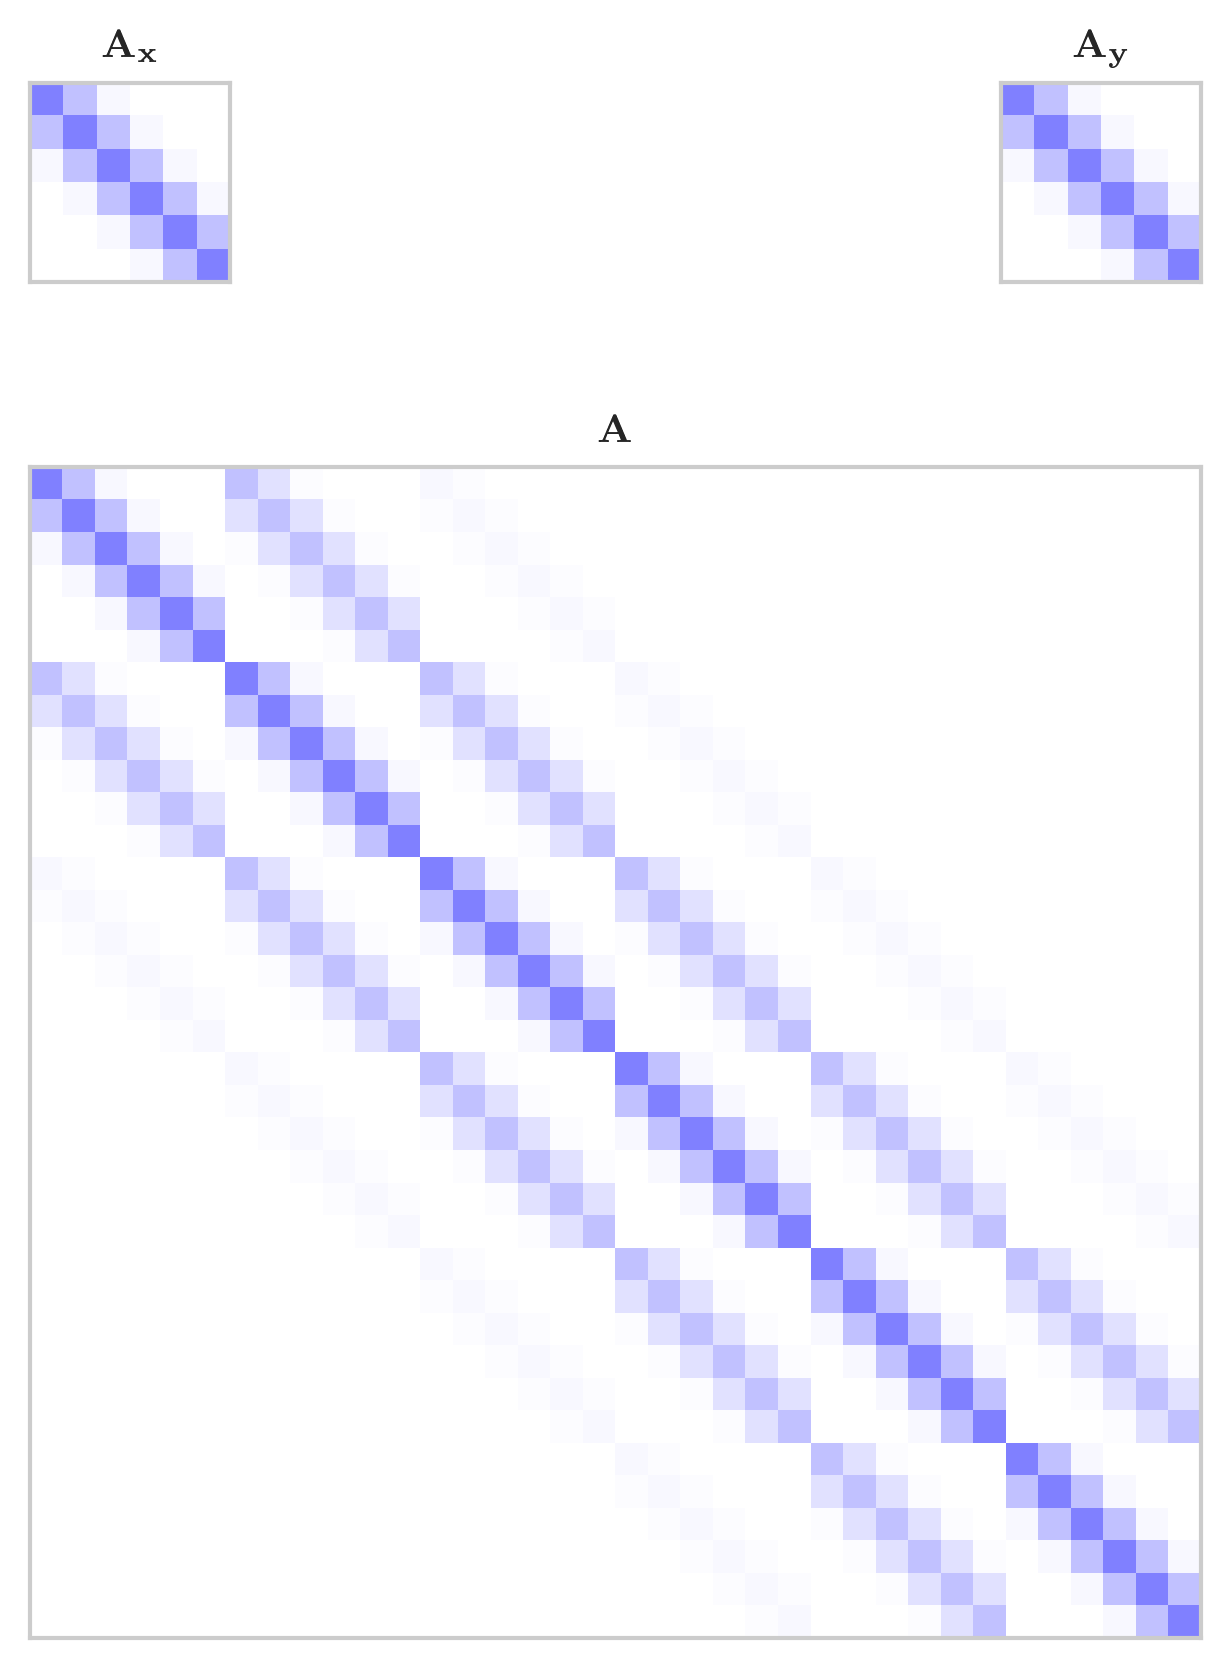

In [17]:
fig = plt.figure(figsize=(5,6))

ax1 = plt.subplot2grid((5,6), (0,0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((5,6), (0,4), rowspan=1, colspan=1)
ax3 = plt.subplot2grid((5,6), (1,0), rowspan=5, colspan=5)

ax1.set_title('$\\mathbf{A_x}$')
#ax1.axis(False)
ax1.imshow(Ax, cmap=cmap)

ax2.set_title('$\\mathbf{A_y}$')
#ax2.axis(False)
ax2.imshow(Ax, cmap=cmap)

ax3.set_title('$\\mathbf{A}$')
#ax3.axis(False)
ax3.imshow(test, cmap=cmap)

for ax in [ax1, ax2, ax3]:
    ax.tick_params(left=False, bottom=False, labelleft=False, labelbottom=False)  # Disable ticks and labels
    ax.grid(False)
    for spine in ax.spines.values():  # Keep the border
        spine.set_visible(True)

fig.tight_layout()
fig.set_dpi(300)
#plt.grid(False)
#fig.savefig("./ltx/images/2dkernel.png", dpi=300)
plt.show()

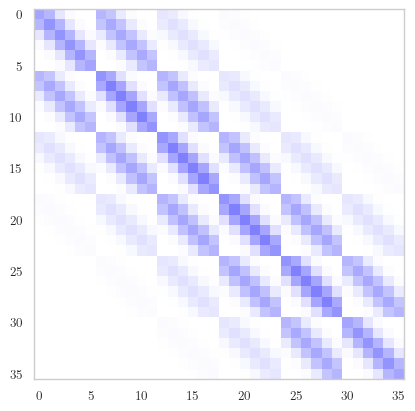

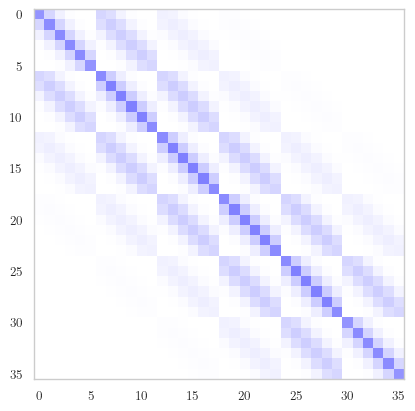

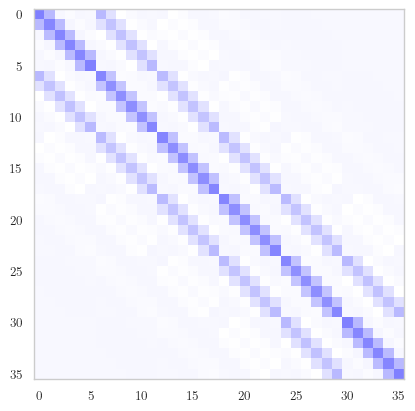

In [21]:
ident = np.eye(36)
alpha = 0.3

tik = test.T@test
plt.imshow(tik, cmap=cmap)
plt.grid(False)
plt.show()

stage2 = tik + alpha*ident
plt.imshow(stage2, cmap=cmap)
plt.grid(False)
plt.show()

final = test @ np.linalg.inv(stage2) @ test.T
plt.imshow(final, cmap=cmap)
plt.grid(False)
plt.show()

In [ ]:
## A Generation
Ax = la.toeplitz(y)
spAx = csr_array(Ax)
Ay = Ax.copy()
spAy = spAx.copy()

A = la.kron(Ax, Ay)

spA = kron(Ax,Ay)
spA.eliminate_zeros()
spA.sum_duplicates()

In [ ]:
scalar = Ax[0,0]
alpha = 0.6
I = np.eye(n,n)
I *= alpha
I /= scalar


